# Wizualizacja Danych Medycznych - Szpitale i Sprzęt według Województw

Analiza i wizualizacja danych z:
- **Tabela 11**: Szpitale ogólne według województw
- **Tabela 73**: Inny sprzęt medyczny według województw

## Autor: Analiza TWD 2023

In [1]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wizualizacji
plt.style.use('ggplot')
sns.set_theme(style="whitegrid", palette="Set2")
%matplotlib inline

# Ustawienia matplotlib dla ładniejszych wykresów
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.color'] = 'white'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11

# Ustawienia pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Biblioteki załadowane - styl ggplot aktywny!")

✓ Biblioteki załadowane - styl ggplot aktywny!


## 1. Wczytanie i Czyszczenie Danych

In [2]:
# Wczytaj dane - pomijamy pierwsze 2 wiersze z nazwami
equipment_raw = pd.read_csv('table1.csv', skiprows=2, encoding='utf-8')
hospitals_raw = pd.read_csv('table2.csv', skiprows=2, encoding='utf-8')

print("Surowe dane - Sprzęt:", equipment_raw.shape)
print("Surowe dane - Szpitale:", hospitals_raw.shape)

Surowe dane - Sprzęt: (22, 35)
Surowe dane - Szpitale: (31, 27)


In [3]:
# Lista województw (bez POLSKA/POLAND i bez źródeł)
voivodeships = [
    'Dolnośląskie',
    'Kujawsko-pomorskie',
    'Lubelskie',
    'Lubuskie',
    'Łódzkie',
    'Małopolskie',
    'Mazowieckie',
    'Opolskie',
    'Podkarpackie',
    'Podlaskie',
    'Pomorskie',
    'Śląskie',
    'Świętokrzyskie',
    'Warmińsko-mazurskie',
    'Wielkopolskie',
    'Zachodniopomorskie'
]

print(f"Liczba województw: {len(voivodeships)}")

Liczba województw: 16


In [19]:
equipment_raw

,WOJEWÓDZTWA\nVOIVODSHIPS,Unnamed: 1,Unnamed: 2,Aparat kobaltowy GAMMAKNIFE\nCobalt apparatus GAMMAKNIFE,Unnamed: 4,Medyczny akcelerator CYBERKNIFE\nMedical accelerator CYBERKNIFE,Unnamed: 6,Respirator\nVentilator,Unnamed: 8,Urządzenie do pozaustrojowej oksygenacji krwi (ECMO)\nExtracorporeal Membrane Oxygenation (ECMO),Unnamed: 10,Urządzenie do bezpiecznego transportu chorych w warunkach pełnej izolacji oddechowej\nDevice for safe transport of patients in conditions of complete respiratory isolation,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,liczba urządzeń\nnumber of equipment,liczba badań\nnumber of diagnostic exams,liczba urządzeń\nnumber of equipment,liczba badań\nnumber of diagnostic exams,liczba urządzeń\nnumber of equipment,liczba pacjentów poddanych terapii\nnumber of ...,liczba urządzeń\nnumber of equipment,liczba pacjentów poddanych terapii\nnumber of ...,liczba urządzeń\nnumber of equipment,liczba przetranspo-\nrtowanych pacjentów\nnumb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POLSKA,NaN,2022.0,1,537,5,1045,17017,147779,172,813,2060,6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POLAND,NaN,2023.0,2,1929,5,1563,17514,158379,188,875,810,4162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dolnośląskie,NaN,NaN,-,-,-,-,1009,19456,11,49,198,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kujawsko-pomorskie,NaN,NaN,-,-,-,-,2008,5864,14,24,11,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Lubelskie,NaN,NaN,-,-,-,-,818,14890,11,7,37,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lubuskie,NaN,NaN,-,-,-,-,721,3123,5,6,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Łódzkie,NaN,NaN,-,-,-,-,1093,7735,15,52,214,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Małopolskie,NaN,NaN,-,-,1,369,1627,14023,17,312,36,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mazowieckie,NaN,NaN,1,1389,1,200,2539,20525,38,191,92,1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Funkcja do czyszczenia danych województw
def clean_voivodship_data(df, voivodeships_list):
    """Wyodrębnia tylko wiersze z województwami"""
    # Pierwsza kolumna to nazwy województw
    df_clean = df.copy()
    df_clean.columns = ['Województwo'] + list(df_clean.columns[1:])
    
    # Usuń spacje z nazw województw
    df_clean['Województwo'] = df_clean['Województwo'].astype(str).str.strip()
    
    # Filtruj tylko województwa
    mask = df_clean['Województwo'].isin(voivodeships_list)
    df_voiv = df_clean[mask].copy()
    
    # Resetuj indeks
    df_voiv = df_voiv.reset_index(drop=True)
    
    return df_voiv

print("✓ Funkcja czyszczenia gotowa")

✓ Funkcja czyszczenia gotowa


In [20]:
equipment_clean
# equipment_clean.iloc[:, 7:12]

,Województwo,Unnamed: 1,Unnamed: 2,Aparat kobaltowy GAMMAKNIFE\nCobalt apparatus GAMMAKNIFE,Unnamed: 4,Medyczny akcelerator CYBERKNIFE\nMedical accelerator CYBERKNIFE,Unnamed: 6,Respirator\nVentilator,Unnamed: 8,Urządzenie do pozaustrojowej oksygenacji krwi (ECMO)\nExtracorporeal Membrane Oxygenation (ECMO),Unnamed: 10,Urządzenie do bezpiecznego transportu chorych w warunkach pełnej izolacji oddechowej\nDevice for safe transport of patients in conditions of complete respiratory isolation,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Inkubatory,Grzejnice_do_noworodkow,Fototeraoia,Respiratory_noworodkowe,Pacjenci_transportowani
0,Dolnośląskie,NaN,NaN,-,-,-,-,1009,19456,11,49,198,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009,19456,11,49,198
1,Kujawsko-pomorskie,NaN,NaN,-,-,-,-,2008,5864,14,24,11,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,5864,14,24,11
2,Lubelskie,NaN,NaN,-,-,-,-,818,14890,11,7,37,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818,14890,11,7,37
3,Lubuskie,NaN,NaN,-,-,-,-,721,3123,5,6,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721,3123,5,6,2
4,Łódzkie,NaN,NaN,-,-,-,-,1093,7735,15,52,214,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093,7735,15,52,214
5,Małopolskie,NaN,NaN,-,-,1,369,1627,14023,17,312,36,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1627,14023,17,312,36
6,Mazowieckie,NaN,NaN,1,1389,1,200,2539,20525,38,191,92,1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2539,20525,38,191,92
7,Opolskie,NaN,NaN,-,-,-,-,441,2380,4,18,36,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441,2380,4,18,36
8,Podkarpackie,NaN,NaN,-,-,-,-,524,4179,3,10,29,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,4179,3,10,29
9,Podlaskie,NaN,NaN,-,-,-,-,414,3356,4,8,15,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414,3356,4,8,15


In [25]:
# Wyczyść dane sprzętu medycznego
equipment_clean = clean_voivodship_data(equipment_raw, voivodeships)

# Wyodrębnij kolumny od indeksu 7 do 12
equipment_data_full = equipment_clean.iloc[:, 7:12].copy()

# Mapowanie normalnych nazw dla kolumn sprzętu medycznego
column_names = {
    equipment_data_full.columns[0]: 'Inkubatory',
    equipment_data_full.columns[1]: 'Grzejnice_do_noworodkow',
    equipment_data_full.columns[2]: 'Fototerapia',
    equipment_data_full.columns[3]: 'Respiratory_noworodkowe',
    equipment_data_full.columns[4]: 'Pacjenci_transportowani',
}

# Zastosuj nazwy dla kolumn, które istnieją
equipment_data_full = equipment_data_full.rename(columns=column_names)

print("Sprzęt medyczny - kolumny 7-12 z normalnymi nazwami:")
print(f"Liczba kolumn: {len(equipment_data_full.columns)}")
print("\nNazwy kolumn:")
for i, col in enumerate(equipment_data_full.columns, start=1):
    print(f"  {i}. {col}")

print("\n" + "="*150)
print("PEŁNE DANE (wszystkie województwa i wszystkie sprzęty 7-12):")
print("="*150)
print(equipment_data_full.to_string())

# Teraz wyodrębnij główne zmienne - wszystkie z zakresu 7-12
equipment_clean['Inkubatory'] = pd.to_numeric(
    equipment_data_full['Inkubatory'].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

equipment_clean['Grzejnice_do_noworodkow'] = pd.to_numeric(
    equipment_data_full['Grzejnice_do_noworodkow'].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

equipment_clean['Fototerapia'] = pd.to_numeric(
    equipment_data_full['Fototerapia'].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

equipment_clean['Respiratory_noworodkowe'] = pd.to_numeric(
    equipment_data_full['Respiratory_noworodkowe'].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

equipment_clean['Pacjenci_transportowani'] = pd.to_numeric(
    equipment_data_full['Pacjenci_transportowani'].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

print("\n" + "="*150)
print("SPRZĘT MEDYCZNY - WSZYSTKIE WYODRĘBNIONE ZMIENNE:")
print("="*150)
print(equipment_clean[['Województwo', 'Inkubatory', 'Grzejnice_do_noworodkow', 
                       'Fototerapia', 'Respiratory_noworodkowe', 'Pacjenci_transportowani']].to_string())

Sprzęt medyczny - kolumny 7-12 z normalnymi nazwami:
Liczba kolumn: 5

Nazwy kolumn:
  1. Inkubatory
  2. Grzejnice_do_noworodkow
  3. Fototerapia
  4. Respiratory_noworodkowe
  5. Pacjenci_transportowani

PEŁNE DANE (wszystkie województwa i wszystkie sprzęty 7-12):
   Inkubatory Grzejnice_do_noworodkow Fototerapia Respiratory_noworodkowe Pacjenci_transportowani
0       1009                   19456          11                      49                     198 
1       2008                    5864          14                      24                      11 
2        818                   14890          11                       7                      37 
3        721                    3123           5                       6                       2 
4       1093                    7735          15                      52                     214 
5       1627                   14023          17                     312                      36 
6       2539                   20525          3

In [26]:
# Wyczyść dane szpitali
hospitals_clean = clean_voivodship_data(hospitals_raw, voivodeships)

# Wyodrębnij liczbę szpitali (kolumna 3)
hospitals_clean['Hospitals_Count'] = pd.to_numeric(
    hospitals_clean.iloc[:, 3].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

# Wyodrębnij liczbę łóżek (kolumna 4)
hospitals_clean['Beds_Count'] = pd.to_numeric(
    hospitals_clean.iloc[:, 4].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

# Wyodrębnij liczbę pacjentów (kolumna 7)
hospitals_clean['Patients_Count'] = pd.to_numeric(
    hospitals_clean.iloc[:, 7].astype(str).str.replace(' ', '').str.replace(',', '.'),
    errors='coerce'
)

print("Szpitale - oczyszczone dane:")
print(hospitals_clean[['Województwo', 'Hospitals_Count', 'Beds_Count', 'Patients_Count']].head(10))

Szpitale - oczyszczone dane:
          Województwo  Hospitals_Count  Beds_Count  Patients_Count
0        Dolnośląskie               78       13039          544547
1  Kujawsko-pomorskie               43        8358          351048
2           Lubelskie               45        9568          373276
3            Lubuskie               24        3766          155221
4             Łódzkie               62       11346          513263
5         Małopolskie               69       13416          595124
6         Mazowieckie              116       23214         1091923
7            Opolskie               29        4030          154586
8        Podkarpackie               41        8686          414382
9           Podlaskie               35        5296          224610


In [24]:
# Połącz dane z obu tabel
merged_data = pd.merge(
    hospitals_clean[['Województwo', 'Hospitals_Count', 'Beds_Count', 'Patients_Count']],
    equipment_clean[['Województwo', 'Respirators', 'ECMO']],
    on='Województwo',
    how='inner'
)

# Oblicz dodatkowe metryki
merged_data['Beds_per_Hospital'] = merged_data['Beds_Count'] / merged_data['Hospitals_Count']
merged_data['Respirators_per_Hospital'] = merged_data['Respirators'] / merged_data['Hospitals_Count']
merged_data['Patients_per_Bed'] = merged_data['Patients_Count'] / merged_data['Beds_Count']

print("\n✓ Dane połączone!")
print(f"Liczba województw w połączonych danych: {len(merged_data)}")
print("\nPierwsze 5 wierszy połączonych danych:")
print(merged_data.head())


✓ Dane połączone!
Liczba województw w połączonych danych: 16

Pierwsze 5 wierszy połączonych danych:
          Województwo  Hospitals_Count  Beds_Count  Patients_Count  \
0        Dolnośląskie               78       13039          544547   
1  Kujawsko-pomorskie               43        8358          351048   
2           Lubelskie               45        9568          373276   
3            Lubuskie               24        3766          155221   
4             Łódzkie               62       11346          513263   

   Respirators  ECMO  Beds_per_Hospital  Respirators_per_Hospital  \
0         1009    11         167.166667                 12.935897   
1         2008    14         194.372093                 46.697674   
2          818    11         212.622222                 18.177778   
3          721     5         156.916667                 30.041667   
4         1093    15         183.000000                 17.629032   

   Patients_per_Bed  
0         41.762942  
1         42.00143

## 2. Podstawowe Statystyki

In [25]:
# Statystyki opisowe
print("Statystyki opisowe:")
print(merged_data.describe().round(2))

Statystyki opisowe:
       Hospitals_Count  Beds_Count  Patients_Count  Respirators   ECMO  \
count            16.00       16.00           16.00        16.00  16.00   
mean             55.88    10075.44       447468.12      1094.62  11.75   
std              32.81     5721.71       256716.41       646.09   9.55   
min              24.00     3766.00       154586.00       414.00   2.00   
25%              38.75     5988.25       274242.75       674.00   4.75   
50%              44.00     8522.00       374663.00       852.00  10.00   
75%              63.75    13106.50       557191.25      1277.50  14.25   
max             143.00    23214.00      1091923.00      2539.00  38.00   

       Beds_per_Hospital  Respirators_per_Hospital  Patients_per_Bed  
count              16.00                     16.00             16.00  
mean              181.11                     20.77             44.30  
std                30.36                      9.41              4.12  
min               138.97     

## 3. Wizualizacje

### 3.1 Liczba Szpitali i Respiratorów według Województw

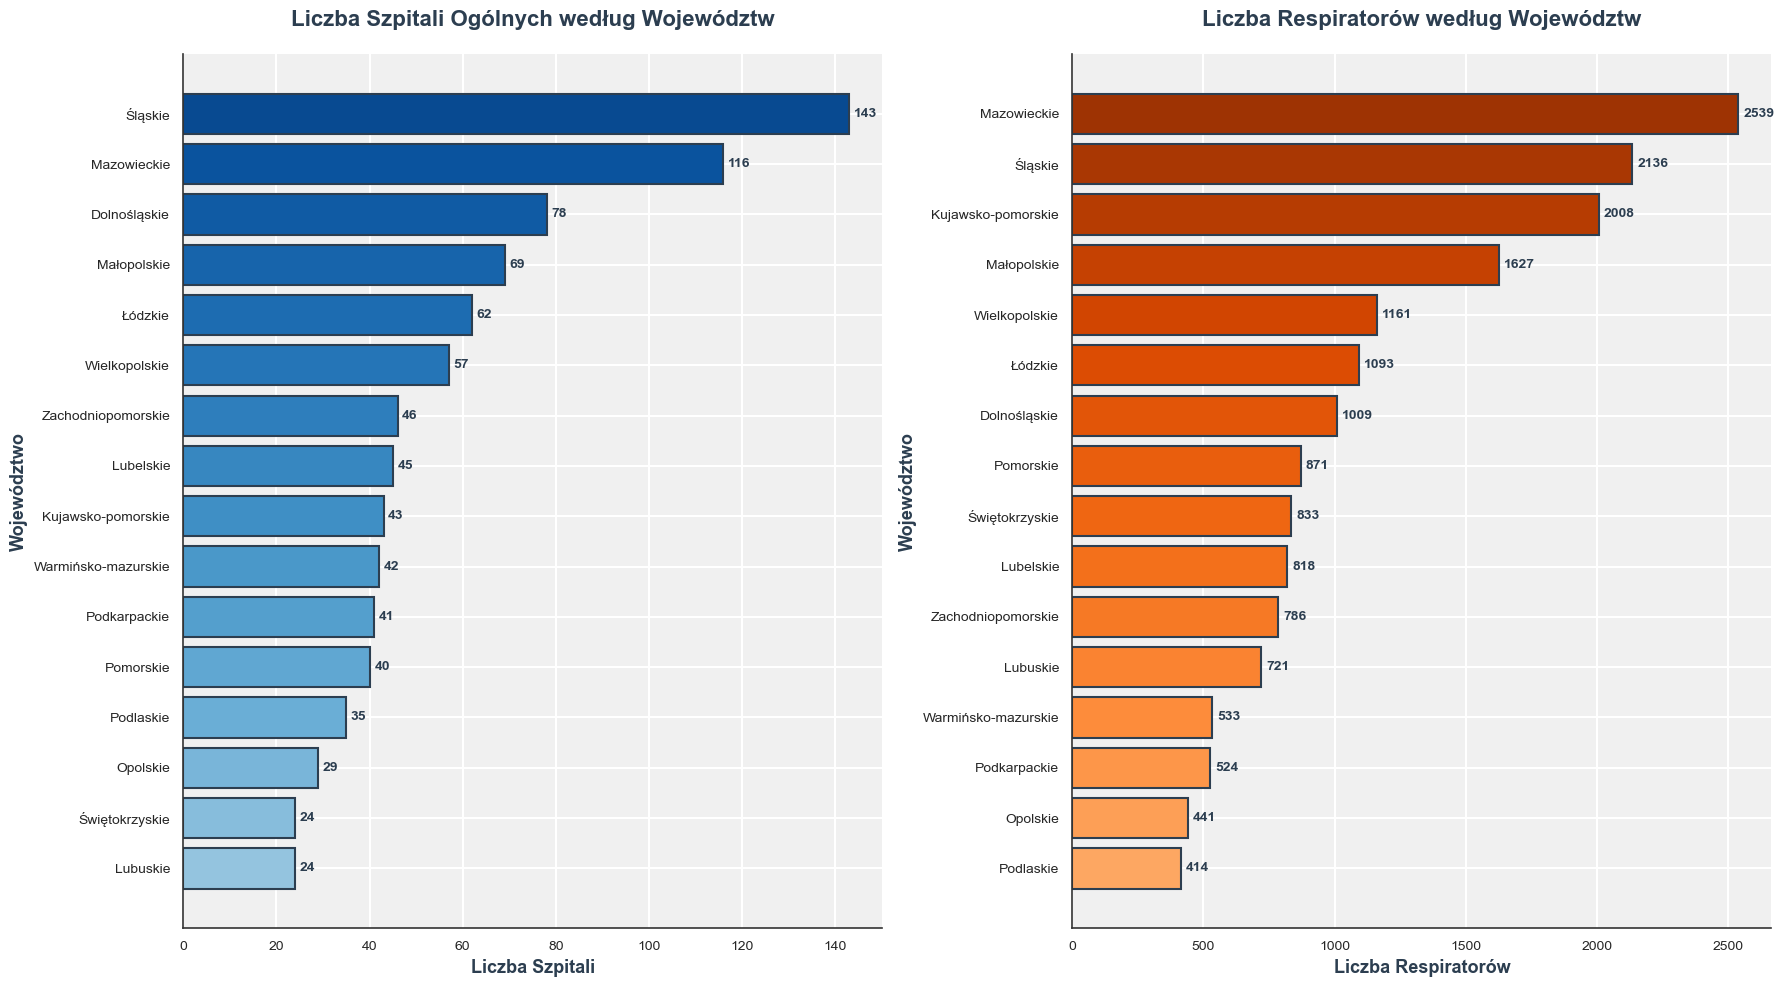

✓ Wykres zapisany: hospitals_respirators_by_voivodship.png


In [26]:
# Sortuj według liczby szpitali
data_sorted = merged_data.sort_values('Hospitals_Count', ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Wykres 1: Liczba szpitali - ggplot style
colors_hospitals = plt.cm.Blues(np.linspace(0.4, 0.9, len(data_sorted)))
bars1 = ax[0].barh(data_sorted['Województwo'], data_sorted['Hospitals_Count'], 
                   color=colors_hospitals, edgecolor='#2c3e50', linewidth=1.5)
ax[0].set_xlabel('Liczba Szpitali', fontsize=13, fontweight='bold', color='#2c3e50')
ax[0].set_ylabel('Województwo', fontsize=13, fontweight='bold', color='#2c3e50')
ax[0].set_title('Liczba Szpitali Ogólnych według Województw', 
                fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Dodaj wartości na końcach słupków
for i, (idx, row) in enumerate(data_sorted.iterrows()):
    ax[0].text(row['Hospitals_Count'] + 1, i, f"{int(row['Hospitals_Count'])}", 
               va='center', fontsize=10, fontweight='bold', color='#2c3e50')

# Wykres 2: Liczba respiratorów - ggplot style
data_sorted_resp = merged_data.sort_values('Respirators', ascending=True)
colors_resp = plt.cm.Oranges(np.linspace(0.4, 0.9, len(data_sorted_resp)))
bars2 = ax[1].barh(data_sorted_resp['Województwo'], data_sorted_resp['Respirators'], 
                   color=colors_resp, edgecolor='#2c3e50', linewidth=1.5)
ax[1].set_xlabel('Liczba Respiratorów', fontsize=13, fontweight='bold', color='#2c3e50')
ax[1].set_ylabel('Województwo', fontsize=13, fontweight='bold', color='#2c3e50')
ax[1].set_title('Liczba Respiratorów według Województw', 
                fontsize=16, fontweight='bold', pad=20, color='#2c3e50')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Dodaj wartości na końcach słupków
for i, (idx, row) in enumerate(data_sorted_resp.iterrows()):
    ax[1].text(row['Respirators'] + 20, i, f"{int(row['Respirators'])}", 
               va='center', fontsize=10, fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.savefig('hospitals_respirators_by_voivodship.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: hospitals_respirators_by_voivodship.png")

### 3.2 Korelacja: Szpitale vs Sprzęt Medyczny

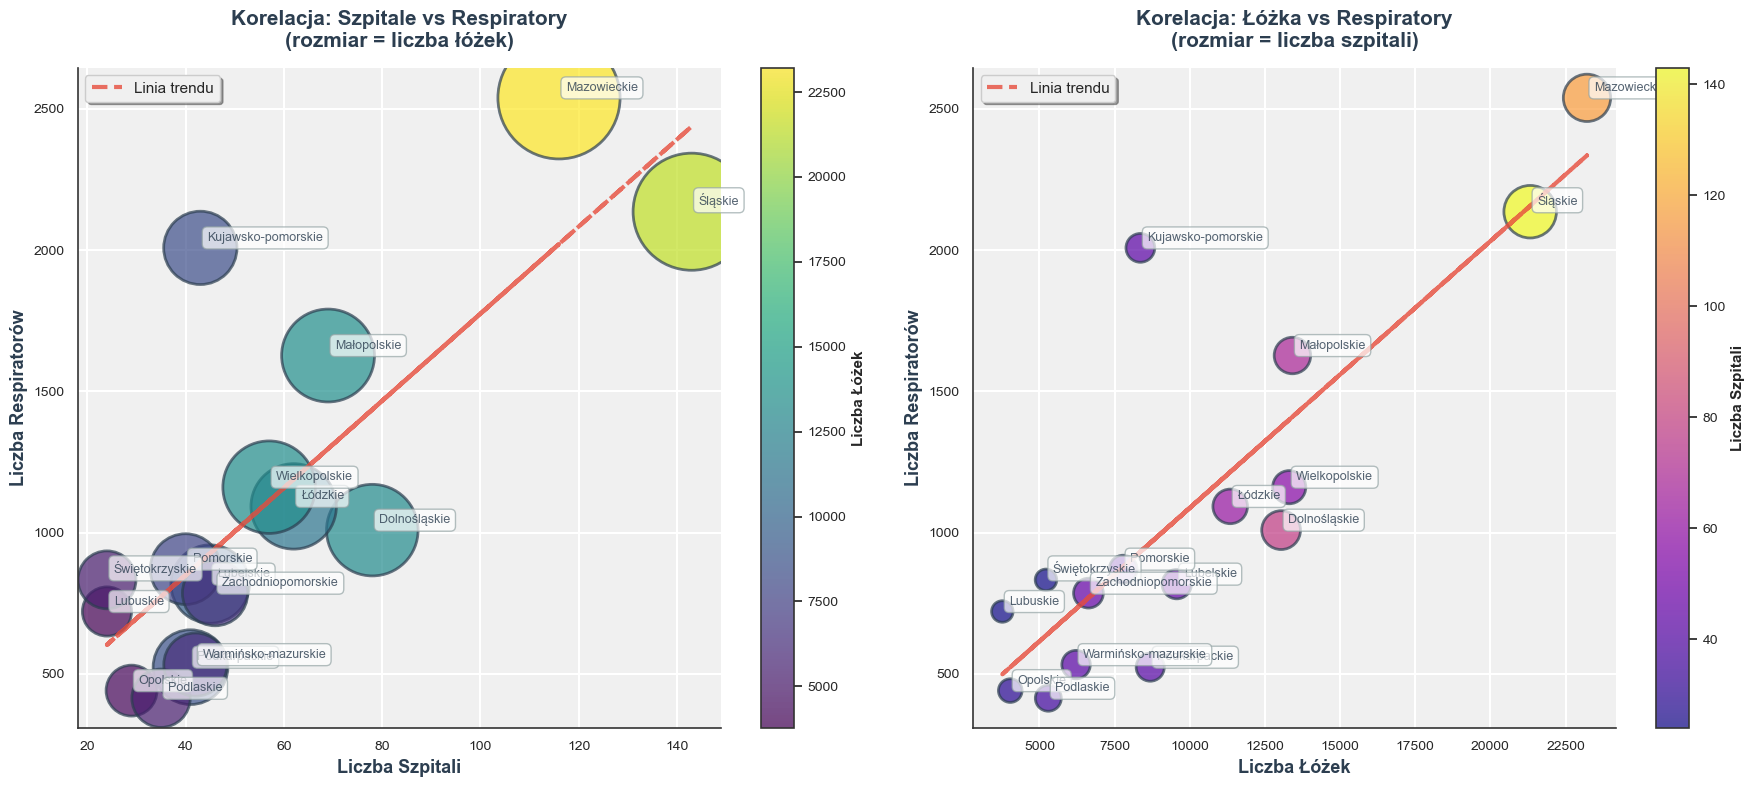

✓ Wykres zapisany: correlation_hospitals_equipment.png


In [27]:
# Scatter plot: Liczba szpitali vs Respiratory - ggplot style
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Wykres 1: Szpitale vs Respiratory
scatter1 = ax[0].scatter(merged_data['Hospitals_Count'], merged_data['Respirators'], 
                         s=merged_data['Beds_Count'] / 3,  # Rozmiar proporcjonalny do łóżek
                         c=merged_data['Beds_Count'], 
                         cmap='viridis', alpha=0.7,
                         edgecolors='#2c3e50', linewidth=2)

# Dodaj etykiety województw
for idx, row in merged_data.iterrows():
    ax[0].annotate(row['Województwo'], 
                   (row['Hospitals_Count'], row['Respirators']),
                   fontsize=9, alpha=0.8, color='#2c3e50',
                   xytext=(5, 5), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                            alpha=0.7, edgecolor='#95a5a6', linewidth=1))

ax[0].set_xlabel('Liczba Szpitali', fontsize=13, fontweight='bold', color='#2c3e50')
ax[0].set_ylabel('Liczba Respiratorów', fontsize=13, fontweight='bold', color='#2c3e50')
ax[0].set_title('Korelacja: Szpitale vs Respiratory\n(rozmiar = liczba łóżek)', 
                fontsize=15, fontweight='bold', pad=15, color='#2c3e50')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Dodaj linię trendu
z = np.polyfit(merged_data['Hospitals_Count'], merged_data['Respirators'], 1)
p = np.poly1d(z)
ax[0].plot(merged_data['Hospitals_Count'], p(merged_data['Hospitals_Count']), 
           color='#e74c3c', linestyle='--', linewidth=3, label='Linia trendu', alpha=0.8)
ax[0].legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Colorbar
cbar1 = plt.colorbar(scatter1, ax=ax[0])
cbar1.set_label('Liczba Łóżek', fontsize=11, fontweight='bold')

# Wykres 2: Łóżka vs Respiratory
scatter2 = ax[1].scatter(merged_data['Beds_Count'], merged_data['Respirators'], 
                         s=merged_data['Hospitals_Count'] * 10,  # Rozmiar proporcjonalny do szpitali
                         c=merged_data['Hospitals_Count'], 
                         cmap='plasma', alpha=0.7,
                         edgecolors='#2c3e50', linewidth=2)

for idx, row in merged_data.iterrows():
    ax[1].annotate(row['Województwo'], 
                   (row['Beds_Count'], row['Respirators']),
                   fontsize=9, alpha=0.8, color='#2c3e50',
                   xytext=(5, 5), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                            alpha=0.7, edgecolor='#95a5a6', linewidth=1))

ax[1].set_xlabel('Liczba Łóżek', fontsize=13, fontweight='bold', color='#2c3e50')
ax[1].set_ylabel('Liczba Respiratorów', fontsize=13, fontweight='bold', color='#2c3e50')
ax[1].set_title('Korelacja: Łóżka vs Respiratory\n(rozmiar = liczba szpitali)', 
                fontsize=15, fontweight='bold', pad=15, color='#2c3e50')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Linia trendu
z2 = np.polyfit(merged_data['Beds_Count'], merged_data['Respirators'], 1)
p2 = np.poly1d(z2)
ax[1].plot(merged_data['Beds_Count'], p2(merged_data['Beds_Count']), 
           color='#e74c3c', linestyle='--', linewidth=3, label='Linia trendu', alpha=0.8)
ax[1].legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

# Colorbar
cbar2 = plt.colorbar(scatter2, ax=ax[1])
cbar2.set_label('Liczba Szpitali', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('correlation_hospitals_equipment.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: correlation_hospitals_equipment.png")

### 3.3 Efektywność: Respiratory na Szpital

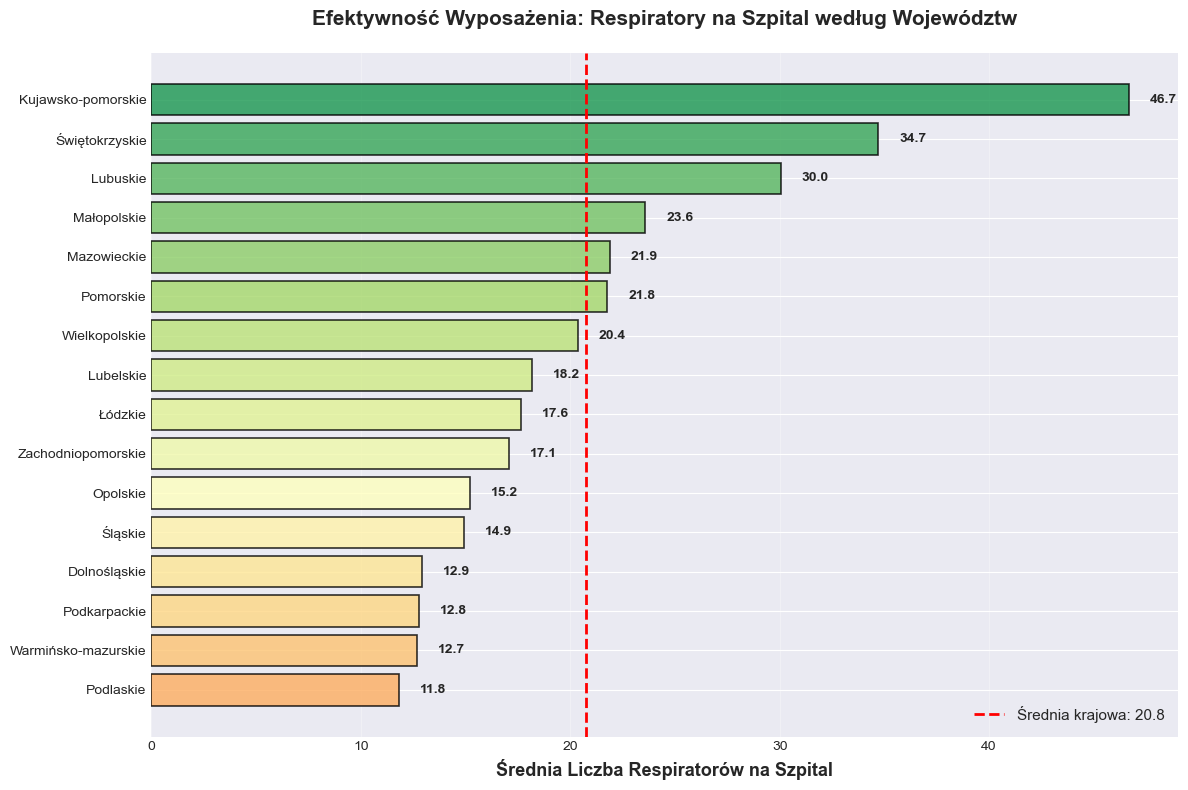

✓ Wykres zapisany: respirators_per_hospital.png


In [ ]:
# Sortuj według respiratorów na szpital - ggplot style
data_efficiency = merged_data.sort_values('Respirators_per_Hospital', ascending=True)

fig, ax = plt.subplots(figsize=(14, 10))

# Gradient kolorów od czerwonego do zielonego
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(data_efficiency)))
bars = ax.barh(data_efficiency['Województwo'], 
               data_efficiency['Respirators_per_Hospital'],
               color=colors, edgecolor='#2c3e50', linewidth=1.8)

# Dodaj wartości na końcach słupków
for i, (idx, row) in enumerate(data_efficiency.iterrows()):
    ax.text(row['Respirators_per_Hospital'] + 1.5, i, 
            f"{row['Respirators_per_Hospital']:.1f}",
            va='center', fontweight='bold', fontsize=11, color='#2c3e50')

ax.set_xlabel('Średnia Liczba Respiratorów na Szpital', 
              fontsize=14, fontweight='bold', color='#2c3e50')
ax.set_ylabel('Województwo', fontsize=14, fontweight='bold', color='#2c3e50')
ax.set_title('Efektywność Wyposażenia: Respiratory na Szpital\npodług Województw', 
             fontsize=17, fontweight='bold', pad=25, color='#2c3e50')

# Usuń ramki
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Średnia krajowa
mean_val = data_efficiency['Respirators_per_Hospital'].mean()
ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=3.5, 
           label=f'Średnia krajowa: {mean_val:.1f}', alpha=0.8)
ax.legend(fontsize=12, loc='lower right', frameon=True, 
          fancybox=True, shadow=True, facecolor='white')

plt.tight_layout()
plt.savefig('respirators_per_hospital.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: respirators_per_hospital.png")

### 3.4 Mapa Cieplna - Korelacje między Zmiennymi

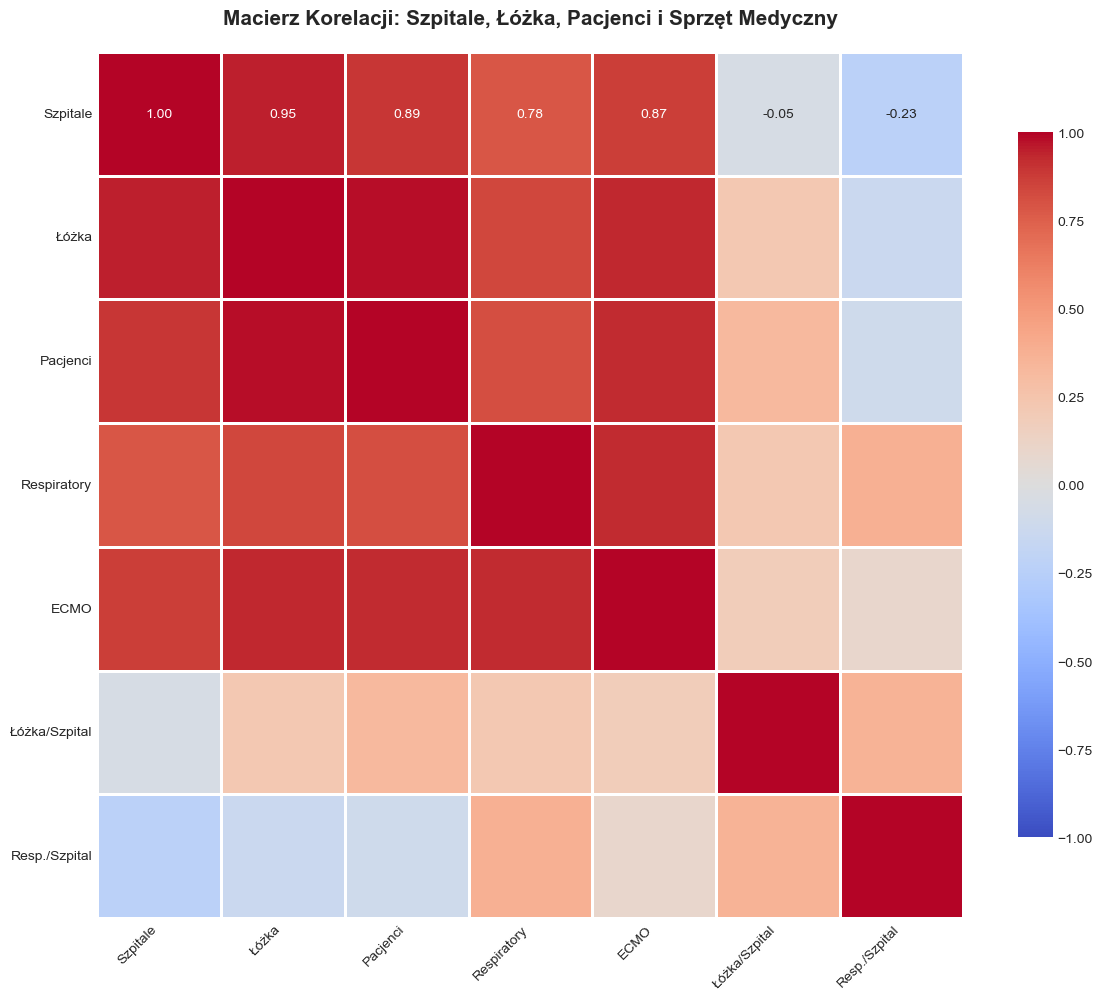

✓ Wykres zapisany: correlation_heatmap.png


In [ ]:
# Macierz korelacji - ggplot style
correlation_columns = ['Hospitals_Count', 'Beds_Count', 'Patients_Count', 
                       'Respirators', 'ECMO', 'Beds_per_Hospital', 
                       'Respirators_per_Hospital']

corr_matrix = merged_data[correlation_columns].corr()

# Mapa cieplna z ładniejszymi ustawieniami
fig, ax = plt.subplots(figsize=(14, 11))

# Użyj seaborn z ładniejszą paletą
sns.heatmap(corr_matrix, annot=True, fmt='.3f', 
            cmap='RdYlBu_r', center=0, 
            square=True, linewidths=3, linecolor='white',
            cbar_kws={"shrink": 0.85, "label": "Korelacja"},
            ax=ax, vmin=-1, vmax=1,
            annot_kws={"size": 12, "weight": "bold", "color": "#2c3e50"})

ax.set_title('Macierz Korelacji\nSzpitale, Łóżka, Pacjenci i Sprzęt Medyczny', 
             fontsize=18, fontweight='bold', pad=25, color='#2c3e50')

# Lepsze nazwy
labels = ['Szpitale', 'Łóżka', 'Pacjenci', 'Respiratory', 'ECMO', 
          'Łóżka/Szpital', 'Resp./Szpital']
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12, 
                   fontweight='bold', color='#2c3e50')
ax.set_yticklabels(labels, rotation=0, fontsize=12, 
                   fontweight='bold', color='#2c3e50')

# Dodaj ramkę
for spine in ax.spines.values():
    spine.set_edgecolor('#2c3e50')
    spine.set_linewidth(2)

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: correlation_heatmap.png")

### 3.5 TOP 5 i BOTTOM 5 Województw

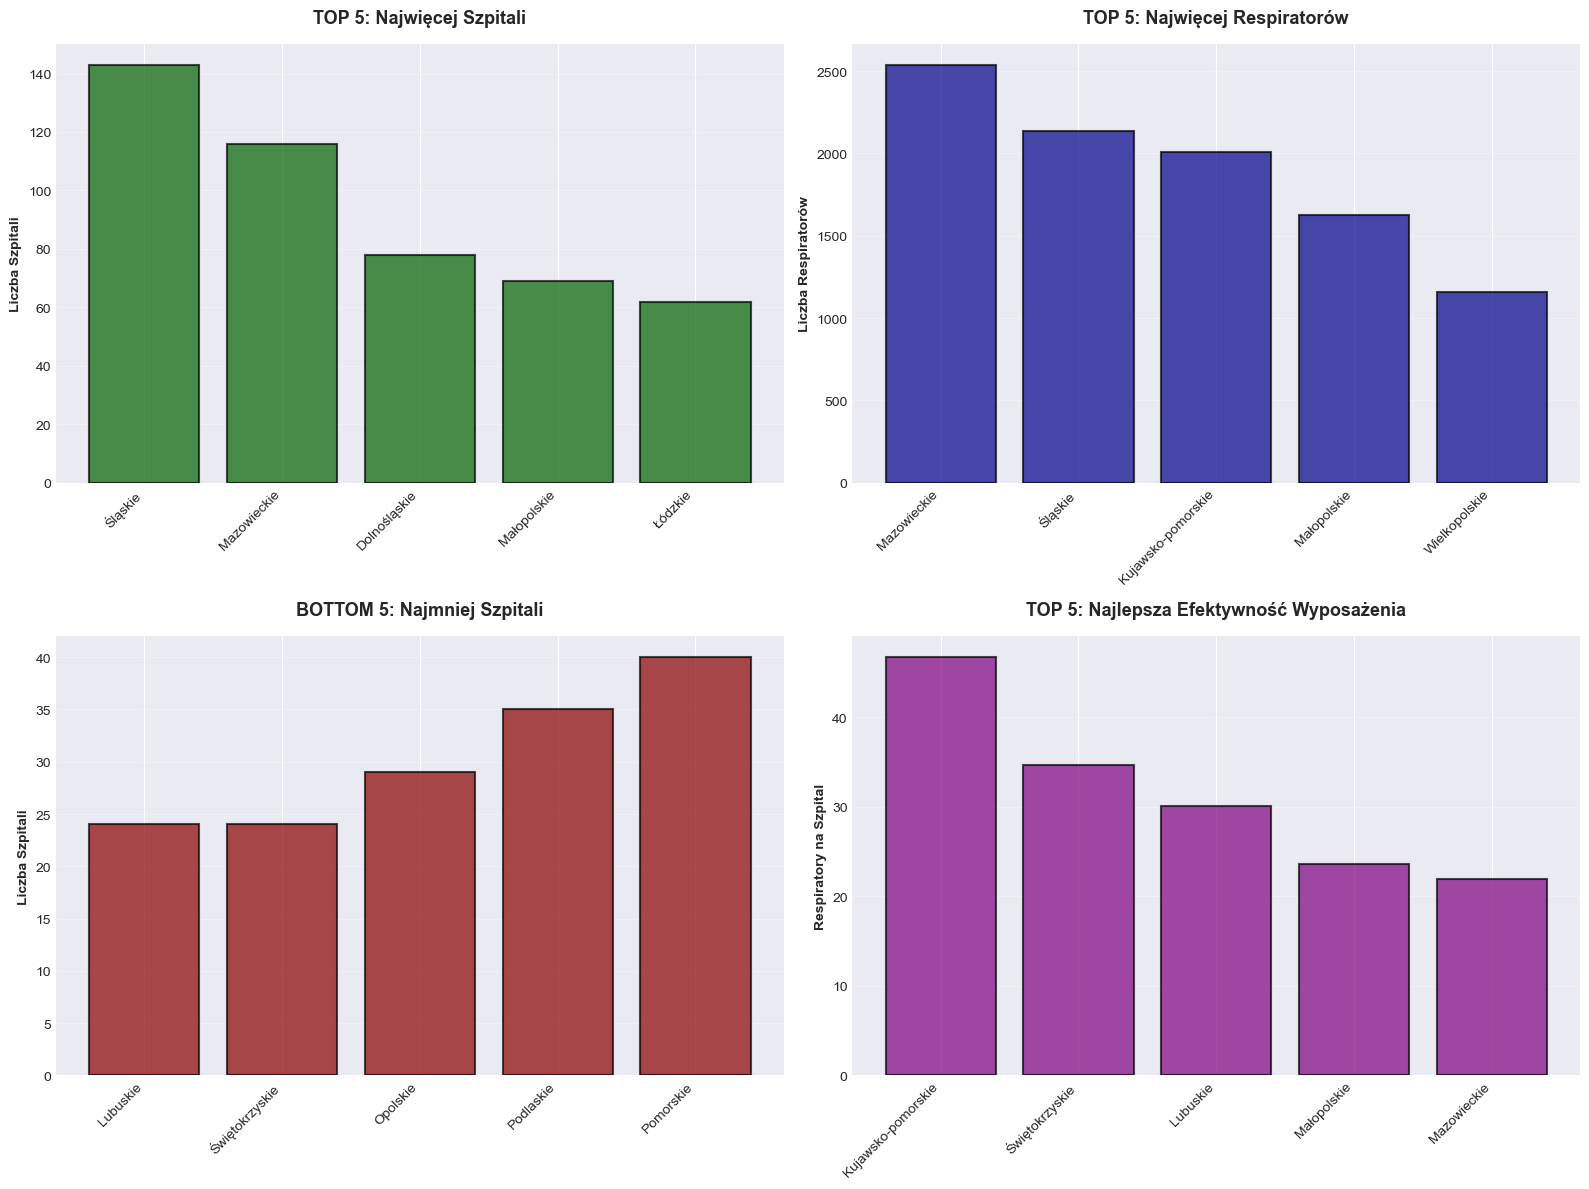

✓ Wykres zapisany: top_bottom_rankings.png


In [ ]:
# Rankingi TOP i BOTTOM - ggplot style
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. TOP 5 - Najwięcej szpitali
top_hospitals = merged_data.nlargest(5, 'Hospitals_Count')
colors1 = plt.cm.Greens(np.linspace(0.5, 0.9, len(top_hospitals)))
bars1 = axes[0, 0].bar(range(len(top_hospitals)), top_hospitals['Hospitals_Count'], 
                       color=colors1, edgecolor='#2c3e50', linewidth=2)
axes[0, 0].set_xticks(range(len(top_hospitals)))
axes[0, 0].set_xticklabels(top_hospitals['Województwo'], rotation=45, ha='right',
                           fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Liczba Szpitali', fontsize=12, fontweight='bold', color='#2c3e50')
axes[0, 0].set_title('🏆 TOP 5: Najwięcej Szpitali', 
                     fontsize=14, fontweight='bold', pad=15, color='#27ae60')
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
# Wartości nad słupkami
for i, (idx, row) in enumerate(top_hospitals.iterrows()):
    axes[0, 0].text(i, row['Hospitals_Count'] + 1, f"{int(row['Hospitals_Count'])}", 
                    ha='center', fontsize=11, fontweight='bold', color='#2c3e50')

# 2. TOP 5 - Najwięcej respiratorów
top_respirators = merged_data.nlargest(5, 'Respirators')
colors2 = plt.cm.Blues(np.linspace(0.5, 0.9, len(top_respirators)))
bars2 = axes[0, 1].bar(range(len(top_respirators)), top_respirators['Respirators'], 
                       color=colors2, edgecolor='#2c3e50', linewidth=2)
axes[0, 1].set_xticks(range(len(top_respirators)))
axes[0, 1].set_xticklabels(top_respirators['Województwo'], rotation=45, ha='right',
                           fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Liczba Respiratorów', fontsize=12, fontweight='bold', color='#2c3e50')
axes[0, 1].set_title('🏆 TOP 5: Najwięcej Respiratorów', 
                     fontsize=14, fontweight='bold', pad=15, color='#2980b9')
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
# Wartości nad słupkami
for i, (idx, row) in enumerate(top_respirators.iterrows()):
    axes[0, 1].text(i, row['Respirators'] + 20, f"{int(row['Respirators'])}", 
                    ha='center', fontsize=11, fontweight='bold', color='#2c3e50')

# 3. BOTTOM 5 - Najmniej szpitali
bottom_hospitals = merged_data.nsmallest(5, 'Hospitals_Count')
colors3 = plt.cm.Reds(np.linspace(0.5, 0.9, len(bottom_hospitals)))
bars3 = axes[1, 0].bar(range(len(bottom_hospitals)), bottom_hospitals['Hospitals_Count'], 
                       color=colors3, edgecolor='#2c3e50', linewidth=2)
axes[1, 0].set_xticks(range(len(bottom_hospitals)))
axes[1, 0].set_xticklabels(bottom_hospitals['Województwo'], rotation=45, ha='right',
                           fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Liczba Szpitali', fontsize=12, fontweight='bold', color='#2c3e50')
axes[1, 0].set_title('📉 BOTTOM 5: Najmniej Szpitali', 
                     fontsize=14, fontweight='bold', pad=15, color='#c0392b')
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
# Wartości nad słupkami
for i, (idx, row) in enumerate(bottom_hospitals.iterrows()):
    axes[1, 0].text(i, row['Hospitals_Count'] + 0.5, f"{int(row['Hospitals_Count'])}", 
                    ha='center', fontsize=11, fontweight='bold', color='#2c3e50')

# 4. TOP 5 - Najlepsza efektywność (Respiratory/Szpital)
top_efficiency = merged_data.nlargest(5, 'Respirators_per_Hospital')
colors4 = plt.cm.Purples(np.linspace(0.5, 0.9, len(top_efficiency)))
bars4 = axes[1, 1].bar(range(len(top_efficiency)), top_efficiency['Respirators_per_Hospital'], 
                       color=colors4, edgecolor='#2c3e50', linewidth=2)
axes[1, 1].set_xticks(range(len(top_efficiency)))
axes[1, 1].set_xticklabels(top_efficiency['Województwo'], rotation=45, ha='right',
                           fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Respiratory na Szpital', fontsize=12, fontweight='bold', color='#2c3e50')
axes[1, 1].set_title('🏆 TOP 5: Najlepsza Efektywność', 
                     fontsize=14, fontweight='bold', pad=15, color='#8e44ad')
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
# Wartości nad słupkami
for i, (idx, row) in enumerate(top_efficiency.iterrows()):
    axes[1, 1].text(i, row['Respirators_per_Hospital'] + 1, 
                    f"{row['Respirators_per_Hospital']:.1f}", 
                    ha='center', fontsize=11, fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.savefig('top_bottom_rankings.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: top_bottom_rankings.png")

### 3.6 Porównanie Kompleksowe: Bubble Chart

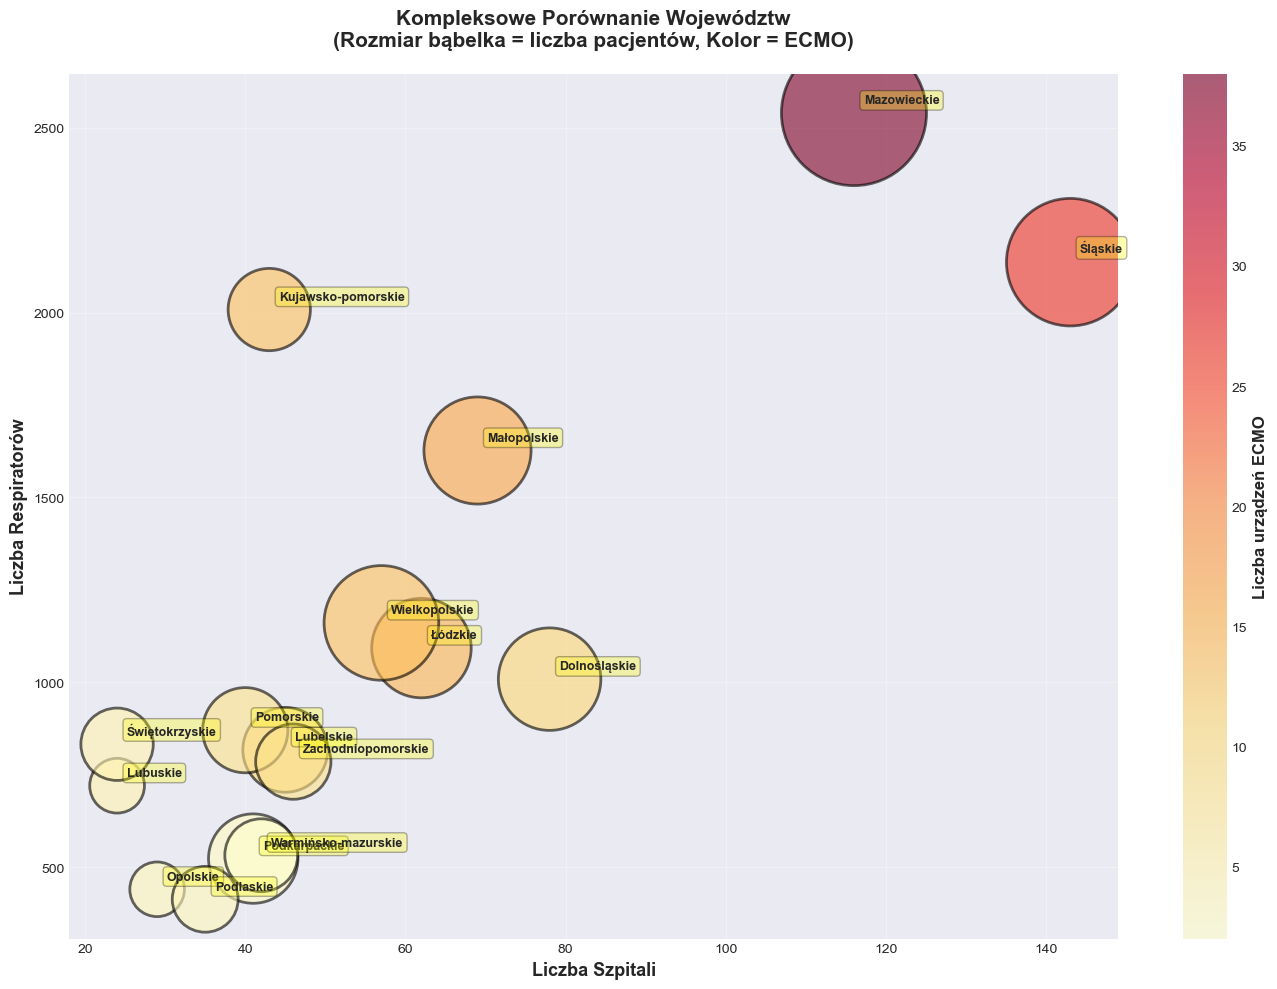

✓ Wykres zapisany: comprehensive_bubble_chart.png


In [ ]:
# Bubble chart kompleksowy - ggplot style
fig, ax = plt.subplots(figsize=(16, 12))

# X: Liczba szpitali, Y: Respiratory, Size: Pacjenci, Color: ECMO
scatter = ax.scatter(
    merged_data['Hospitals_Count'],
    merged_data['Respirators'],
    s=merged_data['Patients_Count'] / 80,  # Skalowanie rozmiaru
    c=merged_data['ECMO'],
    cmap='YlOrRd',
    alpha=0.7,
    edgecolors='#2c3e50',
    linewidth=2.5
)

# Dodaj etykiety z ramkami
for idx, row in merged_data.iterrows():
    ax.annotate(
        row['Województwo'],
        (row['Hospitals_Count'], row['Respirators']),
        fontsize=10,
        fontweight='bold',
        color='#2c3e50',
        xytext=(10, 10),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', 
                 facecolor='white', 
                 alpha=0.8, 
                 edgecolor='#95a5a6', 
                 linewidth=1.5),
        arrowprops=dict(arrowstyle='->', 
                       connectionstyle='arc3,rad=0.3',
                       color='#7f8c8d', 
                       linewidth=1.5)
    )

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Liczba urządzeń ECMO', fontsize=13, fontweight='bold', color='#2c3e50')
cbar.ax.tick_params(labelsize=11)

ax.set_xlabel('Liczba Szpitali', fontsize=14, fontweight='bold', color='#2c3e50')
ax.set_ylabel('Liczba Respiratorów', fontsize=14, fontweight='bold', color='#2c3e50')
ax.set_title('Kompleksowe Porównanie Województw\n' +
             '(Rozmiar bąbelka = liczba pacjentów | Kolor = urządzenia ECMO)',
             fontsize=17, fontweight='bold', pad=25, color='#2c3e50')

# Usuń górną i prawą ramkę
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Dodaj subtelną gridę
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig('comprehensive_bubble_chart.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Wykres zapisany: comprehensive_bubble_chart.png")

## 4. Podsumowanie i Wnioski

In [15]:
print("="*80)
print("PODSUMOWANIE ANALIZY")
print("="*80)

print("\n1. STATYSTYKI OGÓLNE:")
print(f"   - Łączna liczba szpitali: {merged_data['Hospitals_Count'].sum():.0f}")
print(f"   - Łączna liczba łóżek: {merged_data['Beds_Count'].sum():.0f}")
print(f"   - Łączna liczba respiratorów: {merged_data['Respirators'].sum():.0f}")
print(f"   - Łączna liczba ECMO: {merged_data['ECMO'].sum():.0f}")

print("\n2. WOJEWÓDZTWO Z NAJWIĘCEJ:")
print(f"   - Szpitali: {merged_data.loc[merged_data['Hospitals_Count'].idxmax(), 'Województwo']} "
      f"({merged_data['Hospitals_Count'].max():.0f})")
print(f"   - Respiratorów: {merged_data.loc[merged_data['Respirators'].idxmax(), 'Województwo']} "
      f"({merged_data['Respirators'].max():.0f})")
print(f"   - ECMO: {merged_data.loc[merged_data['ECMO'].idxmax(), 'Województwo']} "
      f"({merged_data['ECMO'].max():.0f})")

print("\n3. NAJLEPSZA EFEKTYWNOŚĆ (Respiratory/Szpital):")
top_eff = merged_data.loc[merged_data['Respirators_per_Hospital'].idxmax()]
print(f"   - {top_eff['Województwo']}: {top_eff['Respirators_per_Hospital']:.2f} respiratorów na szpital")

print("\n4. KORELACJE:")
corr_hosp_resp = merged_data['Hospitals_Count'].corr(merged_data['Respirators'])
corr_beds_resp = merged_data['Beds_Count'].corr(merged_data['Respirators'])
print(f"   - Szpitale vs Respiratory: {corr_hosp_resp:.3f}")
print(f"   - Łóżka vs Respiratory: {corr_beds_resp:.3f}")

print("\n" + "="*80)
print("Analiza zakończona! Wygenerowano 6 wykresów.")
print("="*80)

PODSUMOWANIE ANALIZY

1. STATYSTYKI OGÓLNE:
   - Łączna liczba szpitali: 894
   - Łączna liczba łóżek: 161207
   - Łączna liczba respiratorów: 17514
   - Łączna liczba ECMO: 188

2. WOJEWÓDZTWO Z NAJWIĘCEJ:
   - Szpitali: Śląskie (143)
   - Respiratorów: Mazowieckie (2539)
   - ECMO: Mazowieckie (38)

3. NAJLEPSZA EFEKTYWNOŚĆ (Respiratory/Szpital):
   - Kujawsko-pomorskie: 46.70 respiratorów na szpital

4. KORELACJE:
   - Szpitale vs Respiratory: 0.783
   - Łóżka vs Respiratory: 0.836

Analiza zakończona! Wygenerowano 6 wykresów.


## 5. Eksport Wyników

In [16]:
# Zapisz oczyszczone i połączone dane
merged_data.to_csv('merged_medical_data.csv', index=False, encoding='utf-8-sig')
print("✓ Dane połączone zapisane: merged_medical_data.csv")

# Zapisz ranking
ranking = merged_data[['Województwo', 'Hospitals_Count', 'Beds_Count', 
                       'Respirators', 'ECMO', 'Respirators_per_Hospital']].copy()
ranking = ranking.sort_values('Respirators_per_Hospital', ascending=False)
ranking.to_csv('ranking_by_efficiency.csv', index=False, encoding='utf-8-sig')
print("✓ Ranking zapisany: ranking_by_efficiency.csv")

print("\n✅ Wszystkie pliki zapisane pomyślnie!")

✓ Dane połączone zapisane: merged_medical_data.csv
✓ Ranking zapisany: ranking_by_efficiency.csv

✅ Wszystkie pliki zapisane pomyślnie!
